### Diagnosing HD with Python IDT

Let's first import all the necessary libraries. We will use numpy and pandas to start with. For visualization, We will use pyplot subpackage of matplotlib. For implementing Machine Learning models and processing of data, We will use the sklearn library. 

In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
import sklearn as skl
import pandas as pd
%matplotlib inline
%matplotlib notebook

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt # Visuals

from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn import metrics

### Import dataset

Now that we have all the libraries we will need, Let's import the dataset, The dataset is stored in the file HD.csv. We have used the pandas read_csv method to read the dataset.

In [2]:
heartDisease = pd.read_csv('HD.csv') 

### Renaming the attribute names

In [3]:
heartDisease.columns = ['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'FBS', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal','Class']

In [4]:
heartDisease

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Class
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,70,1,4,115,0,0,1,92,1,0.0,2,?,7,1
715,70,1,4,140,0,1,0,157,1,2.0,2,?,7,1
716,72,1,3,160,0,1,2,114,1,1.6,2,2,?,0
717,73,0,3,160,0,0,1,121,1,0.0,1,?,3,1


Deleting the columns which have more number of missing value(FBS, CA, Thal, Slope).

In [5]:
del heartDisease['FBS']
del heartDisease['CA']
del heartDisease['Thal']
del heartDisease['Slope']

In [6]:
heartDisease

,Age,Sex,CP,Trestbps,Chol,Restecg,Thalach,Exang,Oldpeak,Class
0,67,1,4,160,286,2,108,1,1.5,1
1,67,1,4,120,229,2,129,1,2.6,1
2,37,1,3,130,250,0,187,0,3.5,0
3,41,0,2,130,204,2,172,0,1.4,0
4,56,1,2,120,236,0,178,0,0.8,0
...,...,...,...,...,...,...,...,...,...,...
714,70,1,4,115,0,1,92,1,0.0,1
715,70,1,4,140,0,0,157,1,2.0,1
716,72,1,3,160,0,2,114,1,1.6,0
717,73,0,3,160,0,1,121,1,0.0,1


The dataset is now loaded into the variable heartDisease. 
We will just take a glimpse of the data using the describe() and info() methods before we actually start processing and visualizing it.

In [7]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
Age         719 non-null int64
Sex         719 non-null int64
CP          719 non-null int64
Trestbps    719 non-null int64
Chol        719 non-null int64
Restecg     719 non-null int64
Thalach     719 non-null int64
Exang       719 non-null int64
Oldpeak     719 non-null float64
Class       719 non-null int64
dtypes: float64(1), int64(9)
memory usage: 56.3 KB


In [8]:
heartDisease.replace('?','np.nan')

,Age,Sex,CP,Trestbps,Chol,Restecg,Thalach,Exang,Oldpeak,Class
0,67,1,4,160,286,2,108,1,1.5,1
1,67,1,4,120,229,2,129,1,2.6,1
2,37,1,3,130,250,0,187,0,3.5,0
3,41,0,2,130,204,2,172,0,1.4,0
4,56,1,2,120,236,0,178,0,0.8,0
...,...,...,...,...,...,...,...,...,...,...
714,70,1,4,115,0,1,92,1,0.0,1
715,70,1,4,140,0,0,157,1,2.0,1
716,72,1,3,160,0,2,114,1,1.6,0
717,73,0,3,160,0,1,121,1,0.0,1


In [9]:
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
#imputer = imputer.fit(heartDisease)
#heartDisease = pd.heartDisease(imputer.transform(heartDisease), columns=features[:-1]).astype(heartDisease.dtypes.to_dict())

In [10]:
heartDisease.head()

,Age,Sex,CP,Trestbps,Chol,Restecg,Thalach,Exang,Oldpeak,Class
0,67,1,4,160,286,2,108,1,1.5,1
1,67,1,4,120,229,2,129,1,2.6,1
2,37,1,3,130,250,0,187,0,3.5,0
3,41,0,2,130,204,2,172,0,1.4,0
4,56,1,2,120,236,0,178,0,0.8,0


Drop function is used to elimate the values from the table, here we are dropping the column 'Age' and 'Sex'.

In [11]:
z = heartDisease.drop(['Age','Sex'], axis =  1)

Displaying the values after dropping the columns 'Age' and 'Sex'.

In [12]:
z

,CP,Trestbps,Chol,Restecg,Thalach,Exang,Oldpeak,Class
0,4,160,286,2,108,1,1.5,1
1,4,120,229,2,129,1,2.6,1
2,3,130,250,0,187,0,3.5,0
3,2,130,204,2,172,0,1.4,0
4,2,120,236,0,178,0,0.8,0
...,...,...,...,...,...,...,...,...
714,4,115,0,1,92,1,0.0,1
715,4,140,0,0,157,1,2.0,1
716,3,160,0,2,114,1,1.6,0
717,3,160,0,1,121,1,0.0,1


In [13]:
heartDisease['Class'].unique()

array([1, 0], dtype=int64)

In [14]:
x = heartDisease.iloc[:,:-1].values
y = heartDisease.iloc[:,-1].values

In [15]:
y_train = heartDisease['Class']

In [16]:
x_train = heartDisease.drop('Class', axis = 1)

In [17]:
x_train

,Age,Sex,CP,Trestbps,Chol,Restecg,Thalach,Exang,Oldpeak
0,67,1,4,160,286,2,108,1,1.5
1,67,1,4,120,229,2,129,1,2.6
2,37,1,3,130,250,0,187,0,3.5
3,41,0,2,130,204,2,172,0,1.4
4,56,1,2,120,236,0,178,0,0.8
...,...,...,...,...,...,...,...,...,...
714,70,1,4,115,0,1,92,1,0.0
715,70,1,4,140,0,0,157,1,2.0
716,72,1,3,160,0,2,114,1,1.6
717,73,0,3,160,0,1,121,1,0.0


In [18]:
y_train

0      1
1      1
2      0
3      0
4      0
      ..
714    1
715    1
716    0
717    1
718    1
Name: Class, Length: 719, dtype: int64

Split data into train and test.  

In [19]:
# split data into train and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [20]:
from sklearn import tree

from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=10)

In [21]:
# cross_validate - k-fold with multiple metric evalution results
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['accuracy', 'precision_macro', 'recall_macro']
clf = tree.DecisionTreeClassifier()
scores = cross_validate(clf, x, y, cv=10, scoring=scoring)
print("score Keys: ",sorted(scores.keys()))
scores = scores['test_accuracy'] 

score Keys:  ['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro']


In [22]:
# cross_val_predict - Simple stratified k-fold that generates test example outputs
# !! do not use on its own for evaluations
from sklearn.model_selection import cross_val_predict
clf = tree.DecisionTreeClassifier()
scores = cross_val_predict(clf, x, y, cv=10)

Generate the decision tree using the training data and the entropy-based information gain

In [23]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0, min_samples_leaf = 3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Calculate the performance metrics = accuracy and confusion matrix for train and test data 

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
# KFold approach - More complex k-fold cross-validation
scores = []
# kf = KFold(n_splits=n_folds, random_state=14, shuffle=True)
kf = StratifiedKFold(n_splits=10, random_state=14, shuffle=True)
fold = 1
# for train_idxs, test_idxs in kf.split(X):
for train_idxs, test_idxs in kf.split(x, y):
    x_train, x_test = x[train_idxs], x[test_idxs]
    y_train, y_test = y[train_idxs], y[test_idxs]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    # generate evaluation metrics
    print("=" * 60 + "\nFold " + str(fold) + "\n" + "=" * 60)

    print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(x_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, clf.predict(x_train)))
    print("Train - classification report :\n", metrics.classification_report(y_train, clf.predict(x_train)))

    print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(x_test)))
    print("Test - Confusion matrix :\n",metrics.confusion_matrix(y_test, clf.predict(x_test)))
    print("Test - classification report :\n", metrics.classification_report(y_test, clf.predict(x_test)))
    
    fold += 1
    scores += [metrics.accuracy_score(y_test, clf.predict(x_test))]


Fold 1
Train - Accuracy : 1.0
Train - Confusion matrix :
 [[323   0]
 [  0 324]]
Train - classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       324

    accuracy                           1.00       647
   macro avg       1.00      1.00      1.00       647
weighted avg       1.00      1.00      1.00       647

Test - Accuracy : 0.7777777777777778
Test - Confusion matrix :
 [[30  6]
 [10 26]]
Test - classification report :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.81      0.72      0.76        36

    accuracy                           0.78        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.78      0.78      0.78        72

Fold 2
Train - Accuracy : 1.0
Train - Confusion matrix :
 [[323   0]
 [  0 324]]
Train - classification report :
    

In [25]:
# Training the classifier
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Visualize Decision Tree

In [26]:
tree.export_graphviz(clf, out_file='tree.dot')    

from sklearn.externals.six import StringIO  
import pydot 
out_data = StringIO() 
tree.export_graphviz(clf, out_file=out_data,
                    feature_names=heartDisease.columns[:9],
                    class_names=clf.classes_.astype(int).astype(str),
                   # class_names=dataset.columns[:10],
                    filled=True, rounded=True,
                    special_characters=True,
                    node_ids=1,) 
graph = pydot.graph_from_dot_data(out_data.getvalue()) 
graph[0].write_pdf("heartDisease.pdf")  # save to pdf

from IPython.display import IFrame
IFrame("heartDisease.pdf", width=600, height=600)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


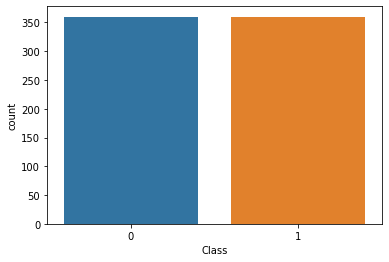

In [27]:
sns.countplot(x='Class',data=heartDisease)
plt.show()